# IMDB Data Analysis 01: Which genres of movies are improving?
**Author:** David S. White <br /> 
**Email:** dswhite2012@gmail.com <br /> 
**Date:** 2020-04-21 <br /> 

### Goal
The goal of this notebook is evaluate whether or not certain generes of movies movies are getting better with time. This will be accessed using data intially downloaded from https://datasets.imdbws.com/ on 2020-04-21. See https://www.imdb.com/interfaces/ for a full description of each of the files. 
This data was cleaned using prior to use here. 



In [1]:
# Libraries
import os 
import glob
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [2]:
movies = pd.read_csv('imdb_movies.csv')

In [3]:
movies.head()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,0,tt0015724,Dama de noche,1993,102,"Drama,Mystery,Romance",6.2,20
1,1,tt0016906,Frivolinas,2014,80,"Comedy,Musical",5.6,15
2,2,tt0031458,El huésped del sevillano,1970,86,Comedy,7.1,8
3,3,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,76740
4,4,tt0036606,"Another Time, Another Place",1983,118,"Drama,War",6.5,247


Looks like saving the file stored the index as an unamed field. remove to keep it simple

In [4]:
movies = movies.drop(["Unnamed: 0"], axis=1)

## Find all the movies that contain "horror" in genere. 

my personal favorite movies are horror movies. Let's start by exploring the data looking only at horror movies.

In [5]:
movies_horror = movies[movies['genres'].str.contains('Horror')]
movies_horror.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7,tt0054724,I Eat Your Skin,1971,92,Horror,3.5,1188
19,tt0061494,Cauldron of Blood,1970,97,"Drama,Horror,Mystery",4.2,335
25,tt0062690,Awakening of the Beast,1970,93,"Drama,Horror",6.1,1028
26,tt0062701,Balsamus l'uomo di Satana,1970,99,"Drama,Fantasy,Horror",6.3,56
36,tt0063132,Alien Terror,1971,90,"Horror,Sci-Fi",3.3,195


In [6]:
movies_horror.describe()

,startYear,runtimeMinutes,averageRating,numVotes
count,10313.000000,10313.000000,10313.000000,10313.000000
mean,2000.621352,90.236982,4.961175,5318.804228
std,12.989860,20.543353,1.288136,27183.648672
min,1970.000000,2.000000,1.000000,5.000000
25%,1990.000000,83.000000,4.100000,40.000000
50%,2006.000000,90.000000,5.000000,209.000000
75%,2011.000000,96.000000,5.900000,1057.000000
max,2014.000000,1440.000000,8.700000,846547.000000


In [7]:
movies_horror.genres.unique()
print(movies_horror.groupby('genres')['tconst'].nunique())

genres
Action,Adventure,Horror      72
Action,Animation,Horror       7
Action,Comedy,Horror        134
Action,Crime,Horror          50
Action,Drama,Horror          73
                           ... 
Horror,Thriller            1251
Horror,Thriller,War           3
Horror,Thriller,Western       7
Horror,War                    7
Horror,Western               12
Name: tconst, Length: 136, dtype: int64


Looks like the simple filter worked. A small caveat with this analysis will be that most horror movies contain more than one genere (e.g. Horror, Thriller; Horror, Comedy) that may bias the results. For now, let's carry on with this data set. 

### Number of ratings vs release year

Are older horror movies getting enough reviews to be reliable? 

In [8]:
# sum up number of votes per year
all_years = movies_horror["startYear"].to_numpy()
all_votes = movies_horror["numVotes"].to_numpy()
total_years = np.unique(all_years)
total_votes = total_years*0
i = 0
for year in total_years:
    total_votes[i] = np.sum(all_votes[all_years == year])
    i = i + 1

print("Max number of votes:", np.max(total_votes))
print("Min number of votes:", np.min(total_votes))

Max number of votes: 3839675
Min number of votes: 96719


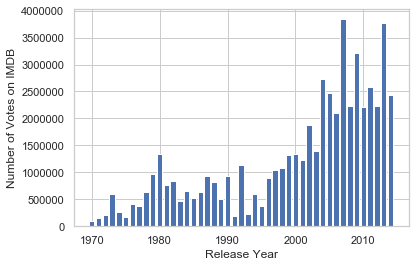

In [9]:
sns.set_style("whitegrid")
plt.bar(total_years, total_votes)
plt.xlabel('Release Year')
plt.ylabel('Number of Votes on IMDB')
plt.show()

there is a trend of movies released > 1990 having more reviews, which is likely due to when IMDB launched (10/1990). The large number of reviews in 1980 are likley due to nostalgia and therefore might be biased. However, overall each year has a large number of reviews. 

### Correlate number of reviews w/ average imdb score

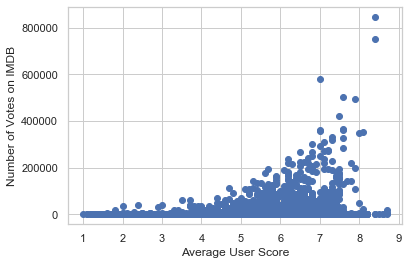

In [10]:
avg_score = movies_horror["averageRating"].to_numpy()
plt.scatter(avg_score, all_votes)
plt.xlabel('Average User Score')
plt.ylabel('Number of Votes on IMDB')
plt.show()

There are certainly a few movies with a large number of reviews and a pretty high average rating. Which movies are they? My guess is that there were released in the 1980s by the last plot... 

In [11]:
most_reviewed = movies_horror.sort_values(by="numVotes", ascending=False)
most_reviewed.head(10)

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
9494,tt0081505,The Shining,1980,146,"Drama,Horror",8.4,846547
7960,tt0078748,Alien,1979,117,"Horror,Sci-Fi",8.4,752114
71815,tt0816711,World War Z,2013,116,"Action,Adventure,Horror",7.0,580345
79519,tt1156398,Zombieland,2009,88,"Adventure,Comedy,Horror",7.6,501520
57525,tt0365748,Shaun of the Dead,2004,99,"Comedy,Horror",7.9,493820
87997,tt1457767,The Conjuring,2013,112,"Horror,Mystery,Thriller",7.5,421648
59858,tt0387564,Saw,2004,103,"Horror,Mystery,Thriller",7.6,366185
49650,tt0289043,28 Days Later...,2002,113,"Drama,Horror,Sci-Fi",7.6,363098
77312,tt1060277,Cloverfield,2008,85,"Action,Horror,Sci-Fi",7.0,362930
82135,tt1259521,The Cabin in the Woods,2011,95,Horror,7.0,357921


So my hypothesis was wrong but it is clear to see where the high counts for number of reviews around 1980 and 1970 are coming from: The Shining and Alien. It is also interesting to note that 4/10 most reviewed movies are about zombies... (5 if you count that Cabin in the Woods which has zombies but is isn't a zombie movie...). It is also interesting that Shaun of the Dead & Zombieland are correctly listed as a horror-comedy but Cabin in the Woods is only horror.

### How many horror movies are released per year? 

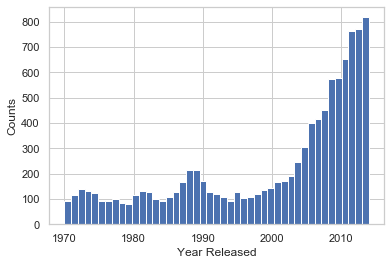

In [13]:
sns.set_style("whitegrid")
plt.hist(all_years, 45)
plt.ylabel('Counts')
plt.xlabel('Year Released')
plt.show()

### review score vs release year of horror movies 

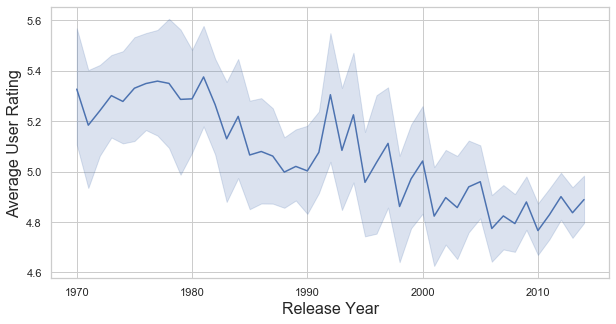

In [14]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]
sns.lineplot(x="startYear", y="averageRating", data=movies_horror)
plt.xlabel("Release Year", fontsize=16)
plt.ylabel("Average User Rating", fontsize=16)
plt.show()

Minor negative trend w/ release year. This is an increase in average user score around 1992; this could be due to the launch of IMDB or it could be do a change in horror movie quality. One way to determine this is to look at other genres.

In [19]:
def parseGenre(data, genre): 
    data_genre = data[data['genres'].str.contains(genre)]
    all_years = data_genre["startYear"].to_numpy()
    avg_score = data_genre["averageRating"].to_numpy()
    all_votes = data_genre["numVotes"].to_numpy()

    return all_years, avg_score, all_votes

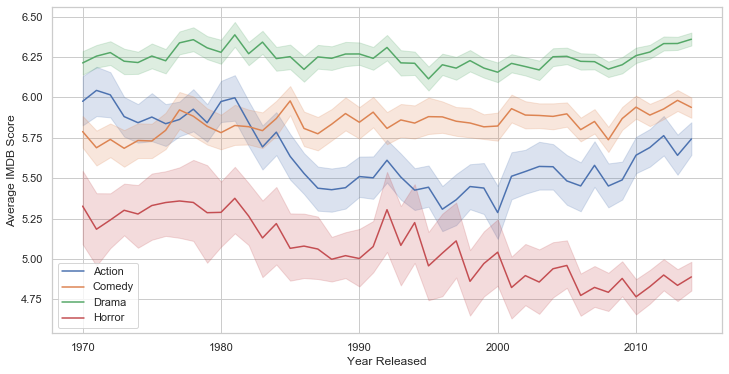

In [30]:
genres = ["Action", "Comedy", "Drama", "Horror"]

plt.rcParams['figure.figsize'] = [12, 6]
for genre in genres:
    all_years, avg_score, all_votes  = parseGenre(movies, genre) 
    sns.lineplot(all_years, avg_score)

plt.xlabel("Year Released")
plt.ylabel("Average IMDB Score")
plt.legend(genres)
plt.show()